# In this notebook we are going to create a Support Vector Regression model using python
In this lesson our task is to build a prediction model to predict the salary of an employee(Level) knowing his/her years of experience and also visual the support vector regression curve . So carefully understand the dataset provided "Position_Salaries.csv". Now ,we will build our model let's get started !!

First we wil start with importing some libraries.

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

Above we have imported a new library called warnings and we have used it to ignore all the warning (not errors!!)

In [4]:
data=pd.read_csv('Position_Salaries.csv')
# print (data)
x= data.iloc[:,1:2].values
# print(x)
y=data.iloc[:,2].values

Till now we have done the obvious, importing some basic libraries and calling our dataset , splliting it into input and output variables.

In [5]:
data.count().isnull()

Position    False
Level       False
Salary      False
dtype: bool

Here we don't need to use imputer because there is no null(NAN) value in our dataset and also we don't need to use encoder as there is no categorical column in our variables.

Now , we will scale our data (yes!! , you read it correctly) because the class which we are going to use to create our SVR object does't provide us with the comfort of automatic scaling like the previous one.

In [6]:
from sklearn.preprocessing import StandardScaler
sc_x=StandardScaler()
sc_y=StandardScaler()
sx=sc_x.fit_transform(x)
yr=y.reshape(-1,1)
sy=sc_y.fit_transform(yr)

In the above cell we have create two object using standard scalar class to scale x and y resp.we are creating two different object because the object tanform itself according to the data input therefore , it is important to scale them independently.

    we have also reshape y into a matrix because before the reshape command it was a vector and scaling can't be perform on a vector.
   

In [7]:
from sklearn.svm import SVR
regressor =SVR(kernel='rbf')
regressor.fit(sx,sy)

SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1,
  gamma='auto_deprecated', kernel='rbf', max_iter=-1, shrinking=True,
  tol=0.001, verbose=False)

In [11]:
a=np.array([[6.5]])

y_pred=regressor.predict(sc_x.transform(a))
y_pred=sc_y.inverse_transform(y_pred)

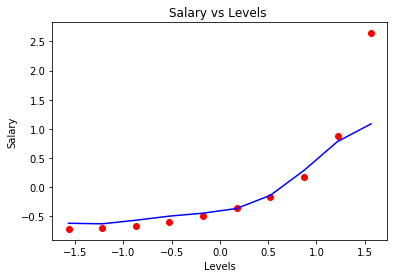

In [9]:
plt.scatter(sx,sy,color='red')
plt.plot(sx,regressor.predict(sx),color='blue')
plt.title('Salary vs Levels ')
plt.xlabel('Levels')
plt.ylabel('Salary')
plt.show()

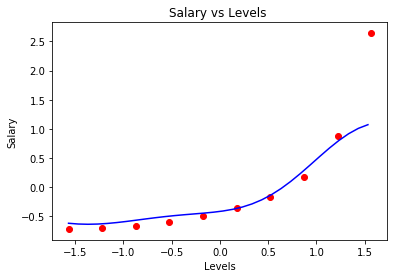

In [10]:
x_grid=np.arange(min(sx),max(sx),0.1)
x_grid=x_grid.reshape((len(x_grid),1))
plt.scatter(sx,sy,color='red')
plt.plot(x_grid,regressor.predict(x_grid),color='blue')
plt.title('Salary vs Levels ')
plt.xlabel('Levels')
plt.ylabel('Salary')
plt.show()